In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



Nous utilisons dans l'analyse qui suit les données collectées par Théa et Yemen.

In [48]:
thea_data = pd.read_csv("data/thea.csv")

x0 = (4.5 + 27/100) * 1e-3 # m
x_photo = (2.5 + 42/100) * 1e-3 # m

# uncertitude approximative (10 graduations sur l'echelle mobile du vernier)
uncert_x0 = 0.1 * 1e-3
# incertitude typique du vernier
uncert_x_photo = 0.005 * 1e-3

e = np.abs(x0 - x_photo)
uncert_e = np.sqrt(uncert_x0**2 + uncert_x_photo**2)

focale = 20 * 1e-2 # m
uncert_focale = 0.5 * 1e-2 # m

print(thea_data)
y = thea_data["pos_screen (mm)"].to_numpy(dtype=float) # mm
I = thea_data["intensity"].to_numpy(dtype=float)

#thea_data2 = pd.read_csv("data/thea2.csv")
#X2 = thea_data2["pos_screen (mm)"].to_numpy(dtype=float)
#I2 = thea_data2["intensity"].to_numpy(dtype=float)


#plt.plot(X2, I2)
#plt.show()



      measure  pos_screen (mm)  intensity
0           0            0.000       73.0
1           1            0.014       30.0
2           2            0.028       43.0
3           3            0.042       52.0
4           4            0.056       35.0
...       ...              ...        ...
2043     2043           28.602       83.0
2044     2044           28.616       73.0
2045     2045           28.630       86.0
2046     2046           28.644       72.0
2047     2047           28.658       87.0

[2048 rows x 3 columns]


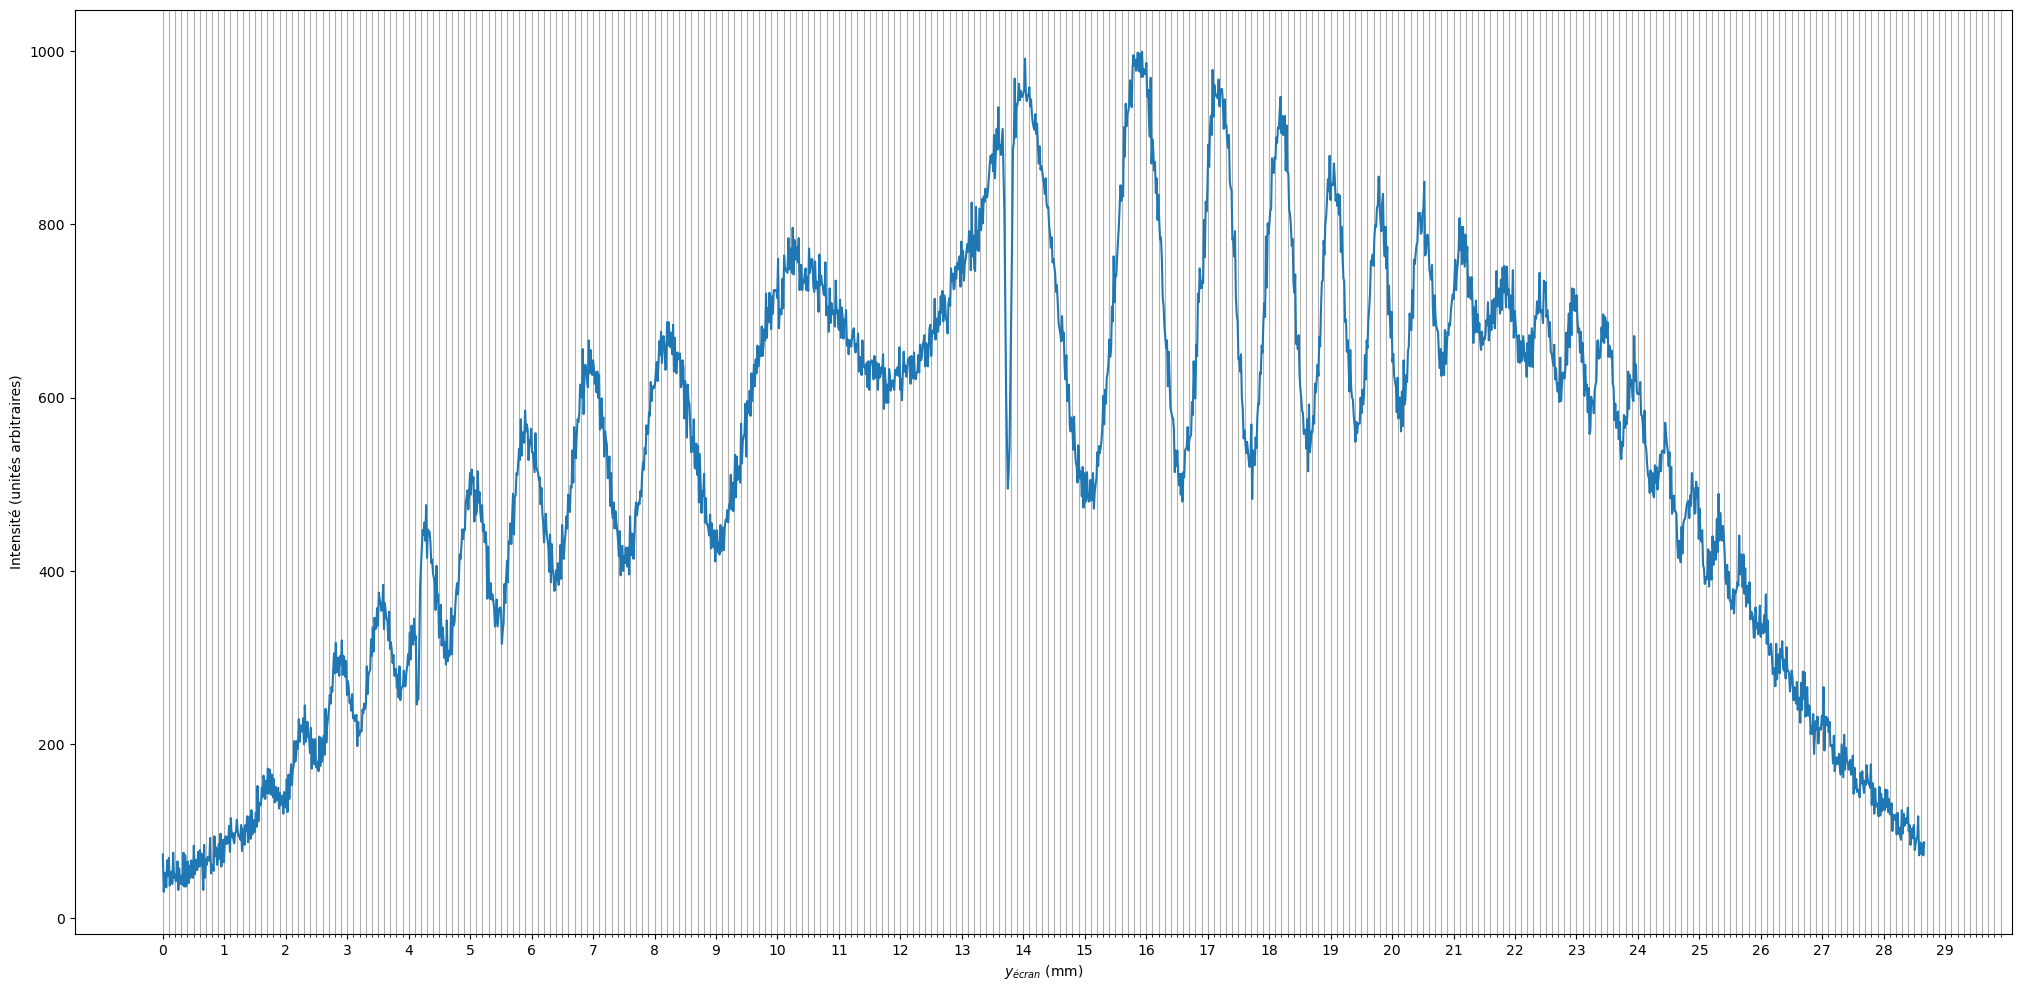

In [14]:
plt.figure(figsize=(25, 12))

plt.plot(y, I)
plt.ylabel("Intensité (unités arbitraires)")
plt.xlabel("$y_{écran}$ (mm)")

plt.xticks(np.arange(0, 30, 1))
plt.xticks(np.arange(0, 30, 0.1), minor=True)

plt.grid(True, which="both", axis="x")

plt.savefig("figs/intensity_plt.png")
plt.show()

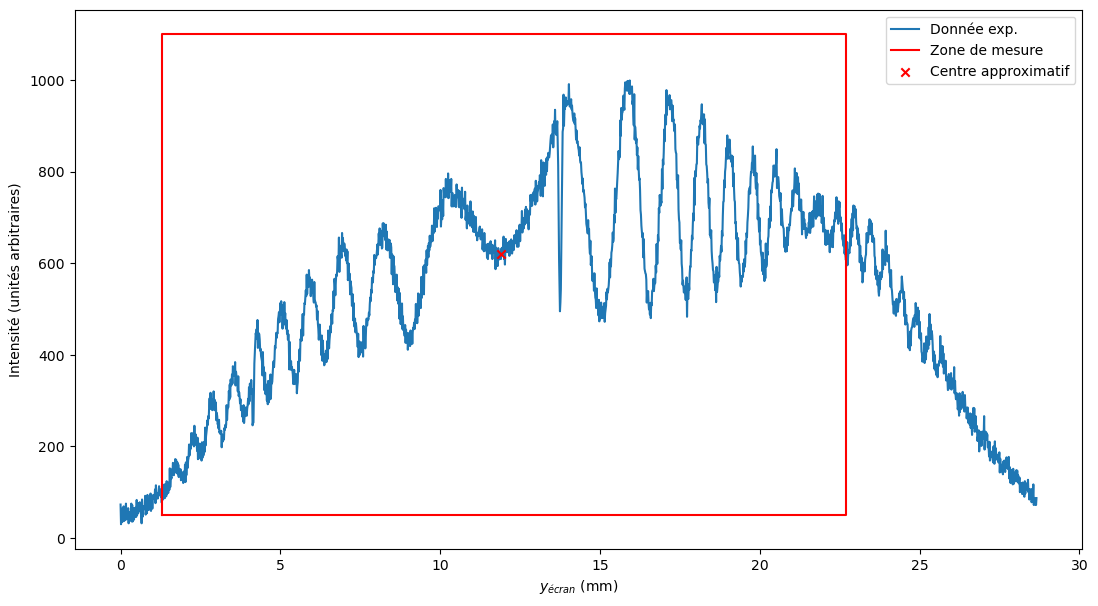

In [100]:
plt.figure(figsize=(13, 7))
plt.plot(y, I, label="Donnée exp.")
plt.ylabel("Intensité (unités arbitraires)")
plt.xlabel("$y_{écran}$ (mm)")

#plt.xticks(np.arange(0, 30, 1))
#plt.xticks(np.arange(0, 30, 0.1), minor=True)

#plt.grid(True, which="both", axis="x")

box_coords = np.array([[1.3, 50], [1.3, 1100], [22.7, 1100], [22.7, 50], [1.3, 50]])

plt.plot(*box_coords.T, c="r", label="Zone de mesure")

plt.scatter(*(11.9, 620), c="r", zorder=5, alpha=1, marker="x", label="Centre approximatif")

plt.legend()

plt.savefig("figs/intensity_plt2.png", dpi=300)
plt.show()

ici nous avons $x_{photo} < x_0$

Pour le réplacement relatif du mirroir, seul la valeur absolue nous interesse.

$|e| = |x_{photo} - x_0|$

## étape 1
$D = f(q)$
on chasse les rayons
On part du centre en identifiant les, on ommet les pics trops raides car ce sont probablement des bugs liées à des capteurs défaillants

le bruit rendant la mesure de la positions des maxima assez inexacte, on prend une incertitude de mesure de 0.2 mm par maximum. Pour trouver diamètre, il nous prendre la difference entres les positions des deux maxima, donc cette les incertitudes de mesures s'ajoutent en quadrature pour faire une erreur de $\approx 0.28 \textrm { mm}$

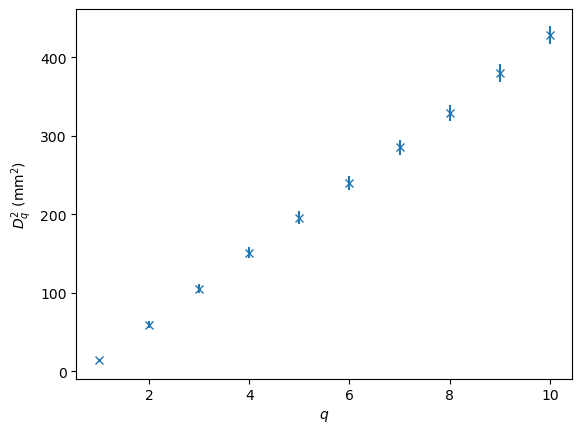

In [67]:
#plt.figure(figsize=(15, 8))
#plt.plot(y, I)
#plt.xlim((9, 15))
#plt.ylabel("Intensité (unités arbitraires)")
#plt.xlabel("$y_{écran}$ (mm)2")

#plt.axvline(10.2)
#plt.axvline(14.2)

#plt.show()

uncert_y = 0.2 * 1e-3 # m
y1 = np.array([14    , 15.9  , 17.15 , 18.2  , 19.05 , 19.8  , 20.45 , 21.0  , 21.8  , 22.4]) * 1e-3
y2 = np.array([10.25 , 8.2   , 6.9   , 5.9   , 5.05  , 4.3   , 3.55  , 2.85  , 2.3   , 1.7]) * 1e-3
q  = np.array([1     , 2     , 3     , 4     , 5     , 6     , 7     , 8     , 9     , 10])

D = y1 - y2
uncert_D = np.sqrt(uncert_y**2 + uncert_y**2)

D_squared = D**2
uncert_D_squared = np.sqrt((2*D*uncert_D)**2)

plt.errorbar(q, D_squared*1e6, yerr=uncert_D_squared*1e6, fmt='x')

plt.ylabel("$D_q^2$ (mm$^2$)")
plt.xlabel("$q$")
plt.show()






En théorie, $D^2$ vérifie l'équation :

$$D_q^2 = 4f^2\frac{\lambda}{\epsilon}\left(q + (\epsilon - 1)\right)$$

[ 4.55564604e-05 -3.15994126e-05]
[1.47396314e-07 4.96986520e-07]


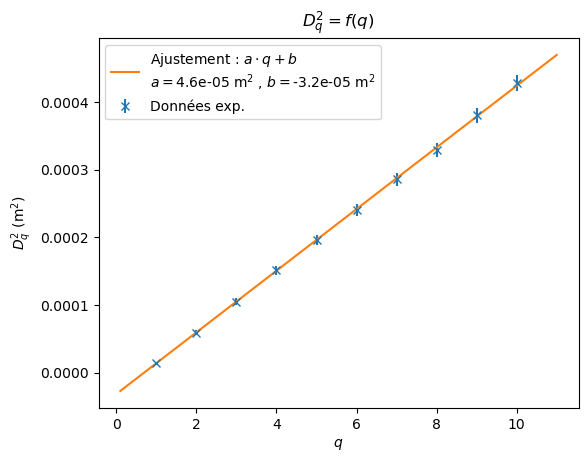

a = 4.56e-05 ± 1.5e-07 m^2
b = -3.16e-05 ± 5e-07 m^2


In [105]:
plt.errorbar(q, D_squared, yerr=uncert_D_squared, fmt='x', label="Données exp.")

def lin_model(x, a, b):
    return a*x + b
popt, pcov = opt.curve_fit(lin_model, q, D_squared, sigma=uncert_D_squared)

a, b = popt
print(popt)

perr = np.sqrt(np.diag(pcov)) # fit error
print(perr)
uncert_a, uncert_b = perr

q_linspace = np.linspace(0.1, 11, 100)
plt.plot(q_linspace, lin_model(q_linspace, a, b), label=f"Ajustement : $a\cdot q + b$\n$a=${a:.2} m$^2$ , $b=${b:.2} m$^2$")

plt.ylabel("$D_q^2$ (m$^2$)")
plt.xlabel("$q$")
plt.legend()
plt.title("$D_q^2 = f(q)$")

plt.gcf().subplots_adjust(left=0.15)

plt.savefig("figs/D2_q.png", dpi=200)
plt.show()

print(f"a = {a:.3} ± {uncert_a:.2} m^2")
print(f"b = {b:.3} ± {uncert_b:.2} m^2")




La relation entre $D^2$ et $q$ est affine, ce qui correspond bien au fait que le rayon des anneaux varie comme $\sqrt{q}$

$$a = 4f^2\frac{\lambda}{e} \implies e = f^2\frac{\lambda}{a}$$

$$b = 4f^2\frac{\lambda}{e}(\epsilon - 1) \implies \epsilon = \frac{be}{4 f^2}$$

In [107]:
#f = 20 * 1e-2 # m, focale de la lentille
lambda_hg = 546 * 1e-9 # m

print(f"{e*1e3:.3} ± {uncert_e*1e3:.2}")
e_exp = 4*focale**2 * lambda_hg/a
print(e_exp)
# the fit is good !

epsilon_exp = b*e/(4*focale**2 * lambda_hg) + 1
uncert_epsilon_exp = np.sqrt( (e/(4*focale**2 * lambda_hg) * uncert_b)**2
                             +(2*b*e/(2*focale**3 * lambda_hg) * uncert_focale)**2 
                             +(b/(4*focale**2 * lambda_hg) * uncert_e)**2 )

print(f"epsilon = {epsilon_exp:.3}±{uncert_epsilon_exp:.2}")

pente_theorique = 4*focale**2 * lambda_hg/e
uncert_pente_theorique = np.sqrt( (8*focale*lambda_hg/e * uncert_focale)**2 
                                 +(4*focale**2 * lambda_hg/(e**2) * uncert_e)**2)

print(f"pente_théorique = {pente_theorique:.3} ± {uncert_pente_theorique:.2} m^2")
print(f"a (pente de la courbe) = {a:.3} ± {uncert_a:.2} m^2")




1.85 ± 0.1
0.0019176204485268002
epsilon = 0.331±0.077
pente_théorique = 4.72e-05 ± 3.5e-06 m^2
a (pente de la courbe) = 4.56e-05 ± 1.5e-07 m^2
